In [39]:
from qiskit import Aer, QuantumCircuit
import matplotlib.pyplot as plt
import pandas as pd
import math
from statsmodels.stats.weightstats import ztest as ztest

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

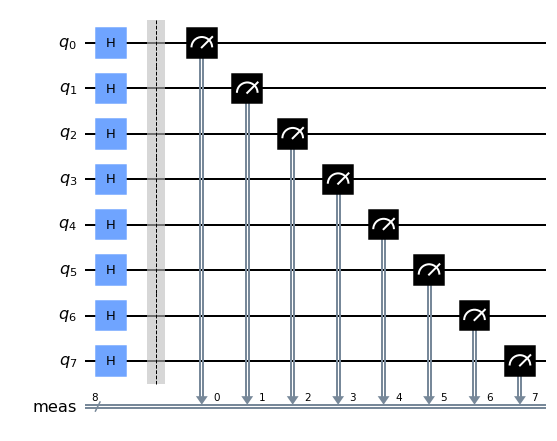

In [40]:
qc = QuantumCircuit(8)
qc.h(range(8))
qc.measure_all()
qc.draw(output='mpl')

In [41]:
sim = Aer.get_backend('aer_simulator')
result = sim.run(qc, shots=100000).result()
counts = result.get_counts()
#counts

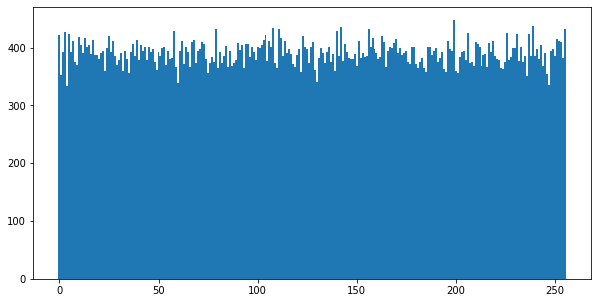

In [17]:
plt.bar([int(x, 2) for x in counts.keys()], counts.values(), width=1)
plt.show()

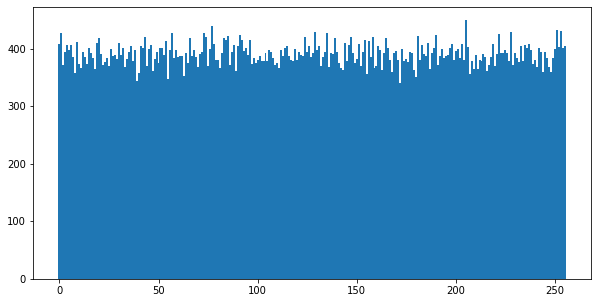

In [42]:
#from qiskit.circuit.library import UniformDistribution
from qiskit_finance.circuit.library import UniformDistribution
qc2 = UniformDistribution(8)
qc2.measure_all()
result2 = sim.run(qc2.decompose(), shots=100000, memory=True).result()
counts2 = result2.get_counts()
plt.bar([int(x, 2) for x in counts2.keys()], counts2.values(), width=1)
plt.show()

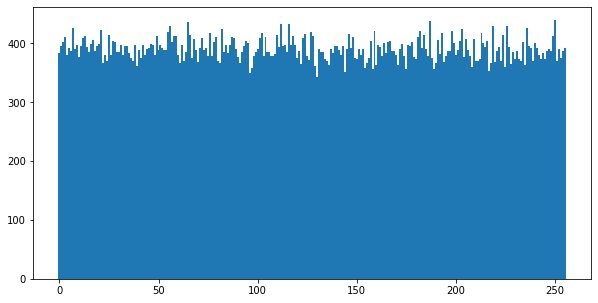

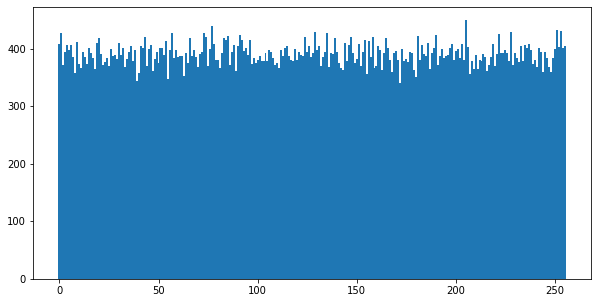

In [49]:
#df1_data = {"number": [numere], "counts": [counts]}
df1_data = {"number": [int(x, 2) for x in counts.keys()], "counts": [x for x in counts.values()]}
df1 = pd.DataFrame.from_dict(df1_data)
df2_data = {"number": [int(x, 2) for x in counts2.keys()], "counts": [x for x in counts2.values()]}
df2 = pd.DataFrame.from_dict(df2_data)
plt.bar(df1['number'], df1['counts'], width=1)
plt.show()
plt.bar(df2['number'], df2['counts'], width=1)
plt.show()

## Nu stiu la ce ma gandeam aici

In [33]:
# asta normal ca nu merge, sunt distributii uniforme, pana la urma - ar merge daca as normaliza count-urile sau ceva
z_table = 1.9675 # sau -1.96, e two-tailed
#z_calc = (df1['counts'].mean() - df2['counts'].mean()) / (math.sqrt(df1.var()['counts'] / len(df1['counts']) + df2.var()['counts']/ len(df2['counts'])))
df1['mult'] = df1['number'] * df1['counts']
df2['mult'] = df2['number'] * df2['counts']
#z_calc = (df1['mult'].mean() - df2['mult'].mean()) / (math.sqrt(df1.var()['mult'] / len(df1['mult']) + df2.var()['mult']/ len(df2['mult'])))
df1

,number,counts,mult
0,78,0.839286,65.464286
1,112,0.928571,104.000000
2,35,0.796875,27.890625
3,61,0.881696,53.783482
4,146,0.854911,124.816964
...,...,...,...
251,22,0.881696,19.397321
252,10,0.933036,9.330357
253,144,0.908482,130.821429
254,145,0.877232,127.198661


In [13]:
# si asa s-ar face cu metoda gata implementata, daca ar fi distributie normala
ztest(df1['mult'], df2['mult'], value=0)

(-0.007817242950707664, 0.9937628060667294)

In [32]:
df1['counts'] = df1['counts'] / df1['counts'].max()
df2['counts'] = df2['counts'] / df2['counts'].max()
#plt.bar(df1['number'], df1['counts'], width=1)
#plt.show()
#df1['counts'].min()
#df1['counts'].mean() - df2['counts'].mean()
#ztest(df1['counts'], df2['counts'], value=0)
z_calc = (df1['counts'].mean() - df2['counts'].mean()) / (math.sqrt(df1.var()['counts'] / len(df1['counts']) + df2.var()['counts']/ len(df2['counts'])))
z_calc

2.453906873721462

In [93]:
from qiskit_finance.circuit.library import NormalDistribution

qc3 = NormalDistribution(8, mu=1, sigma=0.2, bounds=(0, 2))
qc3.decompose().draw(output='mpl')
qc3.measure_all()
result3 = sim.run(qc3.decompose().decompose().decompose().decompose().decompose().decompose().decompose().decompose().decompose(), shots=100000, memory=True).result()
counts3 = result3.get_counts()


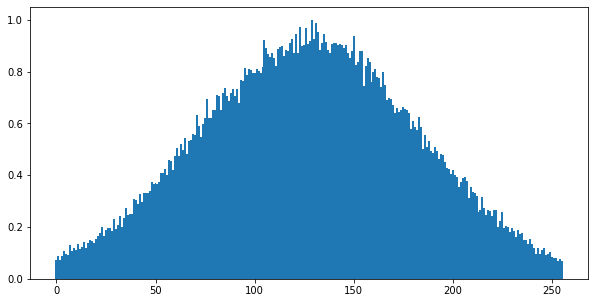

In [94]:
df3_data = {"number": [int(x, 2) for x in counts3.keys()], "counts": [x for x in counts3.values()]}
df3 = pd.DataFrame.from_dict(df3_data)
df3['counts'] = df3['counts'] / df3['counts'].max()
plt.bar(df3['number'], df3['counts'], width=1)
plt.show()

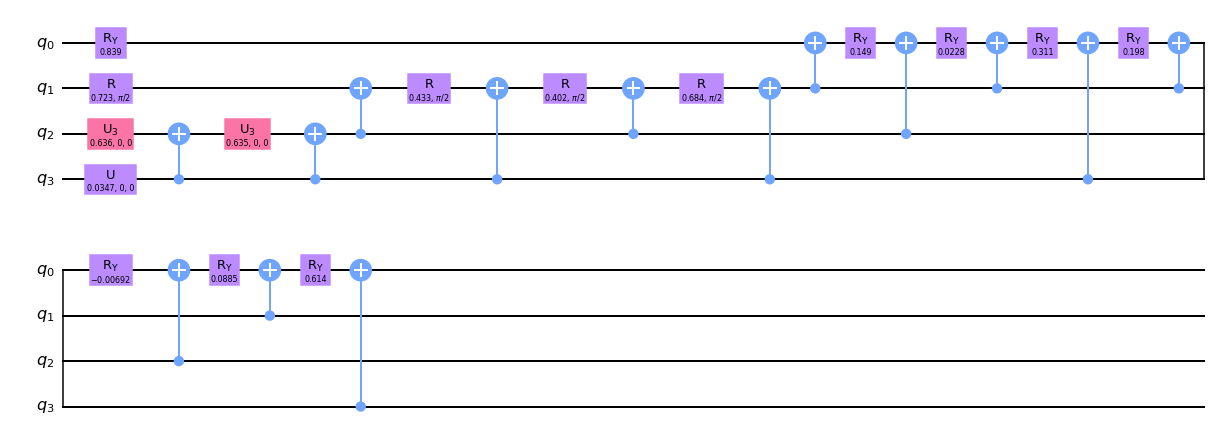

In [113]:
qc3 = NormalDistribution(4, mu=1, sigma=0.2, bounds=(0, 5))
qc3.decompose().decompose().decompose().decompose().decompose().draw(output='mpl')